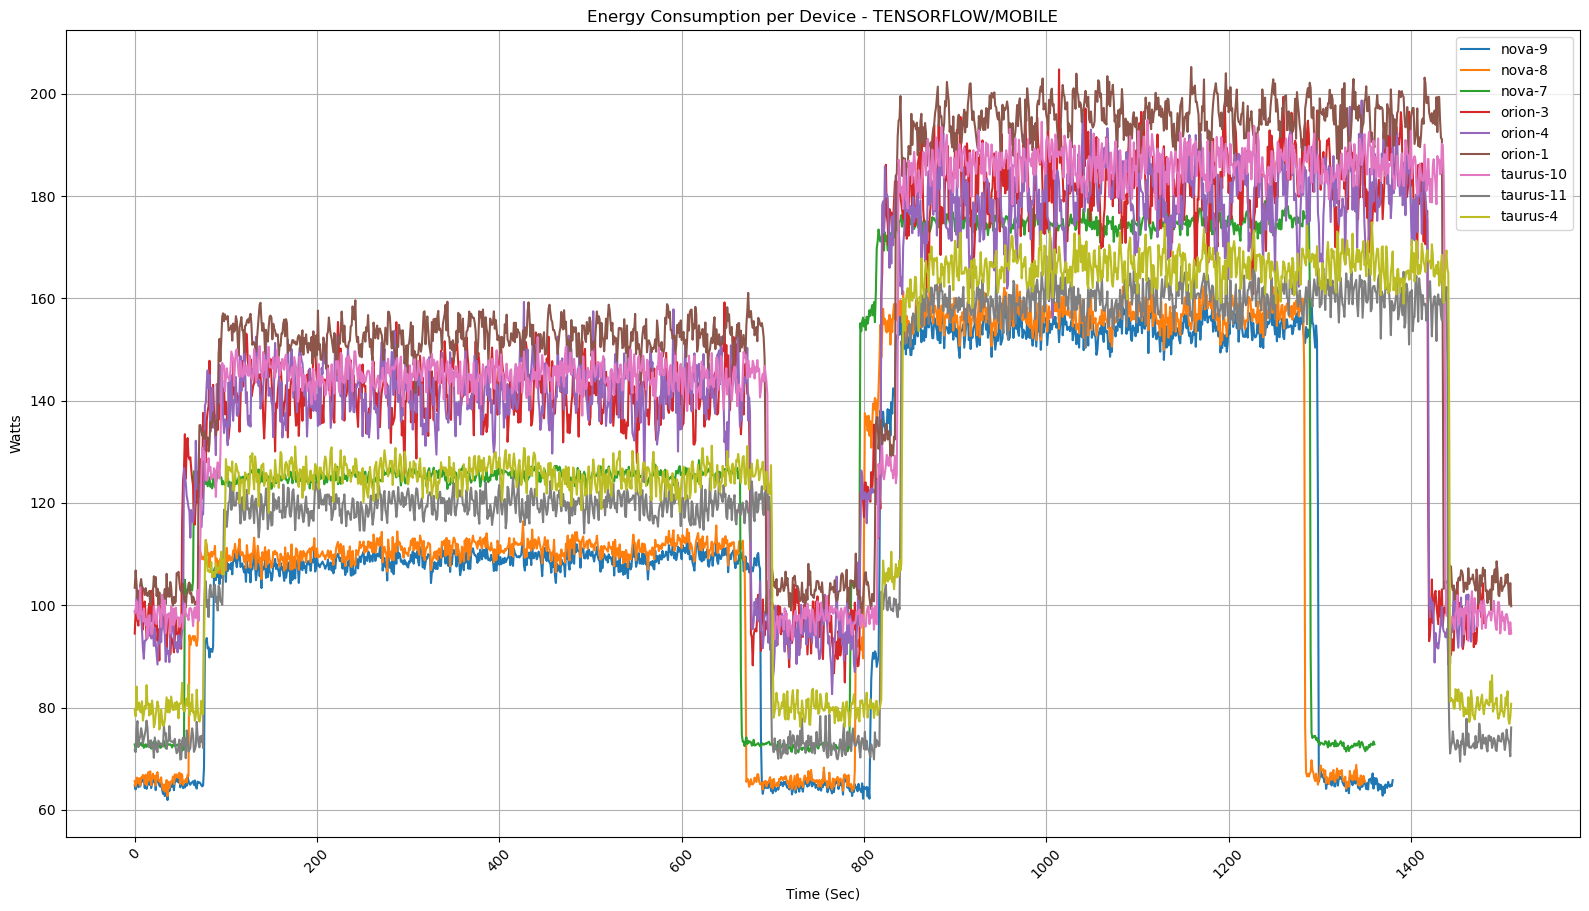

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Lista de archivos CSV a leer
path_f = ['20250714']
device = ['nova', 'orion', 'taurus']
frame = ['01_start','02_onnx','03_tf']
frame_t = frame[2]  # '03_tf'
test = ['mob','res']
test_f = test[0]    # 'mob'

# Diccionario con los IDs por dispositivo
device_ids = {
    'nova':   ['1903864', '1903865', '1903866'],
    'orion':  ['1903860', '1903861', '1903862'],
    'taurus': ['1903712', '1903716', '1903856']
}

archivos_csv = []

for dev in device:
    for dev_id in device_ids[dev]:
        #ruta = f"{path_f[0]}/{dev}/{frame_t}/{dev}_{dev_id}_metric_{frame_t}_w.csv"
        ruta = f"{path_f[0]}/{dev}/{frame_t}/{dev}_{dev_id}_metric_{frame_t}_{test_f}_w.csv"
        archivos_csv.append(ruta)

# Inicializar la figura
plt.figure(figsize=(16, 9))

for archivo in archivos_csv:
    if not os.path.isfile(archivo):
        print(f"Archivo no encontrado: {archivo}")
        continue

    try:
        df = pd.read_csv(archivo)

        # Verifica que las columnas necesarias existan
        if all(col in df.columns for col in ["time", "value", "device_id"]):
            device_id = df["device_id"].iloc[0]
            plt.plot(df["time"], df["value"], label=str(device_id))
        else:
            print(f"El archivo {archivo} no contiene las columnas requeridas.")
    except Exception as e:
        print(f"Error leyendo {archivo}: {e}")

# Etiquetas de los ejes y título
plt.xlabel("Time (Sec)")
plt.ylabel("Watts")
plt.title("Energy Consumption per Device - TENSORFLOW/MOBILE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
